In [3]:
#importing the csv file to google colab
#exploratory data analyses
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/co2 Emissions.csv')
#also import all the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
print(df.head(10))

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   
5  ACURA         RLX      MID-SIZE             3.5          6          AS6   
6  ACURA          TL      MID-SIZE             3.5          6          AS6   
7  ACURA      TL AWD      MID-SIZE             3.7          6          AS6   
8  ACURA      TL AWD      MID-SIZE             3.7          6           M6   
9  ACURA         TSX       COMPACT             2.4          4          AS5   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11

In [ ]:
print(df.tail(10))

       Make          Model          Vehicle Class  Engine Size(L)  Cylinders  \
7375  VOLVO     S90 T6 AWD               MID-SIZE             2.0          4   
7376  VOLVO         V60 T5  STATION WAGON - SMALL             2.0          4   
7377  VOLVO     V60 T6 AWD  STATION WAGON - SMALL             2.0          4   
7378  VOLVO  V60 CC T5 AWD  STATION WAGON - SMALL             2.0          4   
7379  VOLVO    XC40 T4 AWD            SUV - SMALL             2.0          4   
7380  VOLVO    XC40 T5 AWD            SUV - SMALL             2.0          4   
7381  VOLVO    XC60 T5 AWD            SUV - SMALL             2.0          4   
7382  VOLVO    XC60 T6 AWD            SUV - SMALL             2.0          4   
7383  VOLVO    XC90 T5 AWD         SUV - STANDARD             2.0          4   
7384  VOLVO    XC90 T6 AWD         SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
7375          AS8         Z                           

# **Data Cleaning and Data Integrat**

In [8]:
#check null values
df.isnull().sum()
#we can see that there is no null value

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [9]:
# collecting the information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [10]:
#checking the shape of the data set
df.shape

(7385, 12)

In [11]:
len(df)

7385

In [12]:
df.duplicated().sum()
#duplicate values

1103

In [13]:
df.drop_duplicates(inplace=True)
#drop the duplicates


In [14]:
#currect size
len(df)

6282

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


In [ ]:
df.head(500)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
495,HONDA,CR-Z,TWO-SEATER,1.5,4,M6,X,7.6,6.1,6.9,41,159
496,HONDA,FIT,STATION WAGON - SMALL,1.5,4,A5,X,8.3,6.5,7.5,38,172
497,HONDA,FIT,STATION WAGON - SMALL,1.5,4,M5,X,8.3,6.9,7.7,37,177
498,HONDA,ODYSSEY,MINIVAN,3.5,6,A6,X,12.3,8.5,10.6,27,244


In [17]:
#to be safe, get the indexes right
df.reset_index(drop=True, inplace=True)

In [16]:
#display first 5
df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# **Visualisation**

AttributeError: 'DataFrame' object has no attribute 'EngineSize'

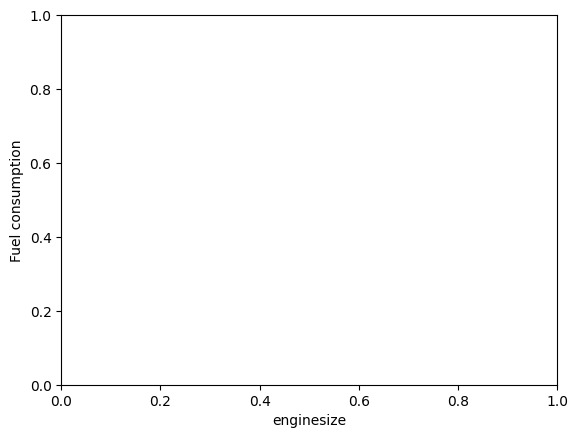

In [18]:
%matplotlib inline
plt.xlabel('enginesize')
plt.ylabel('Fuel consumption')
plt.scatter(df.EngineSize(L), df.FuelConsumptionHwy,color='red',marker ='+')

In [19]:
# brands of cars
print("Total car companies are", len(df['Make'].unique()))
print("the brands are")
df_brand=df['Make'].value_counts().reset_index()
df_brand

Total car companies are 42
the brands are


,Make,count
0,FORD,577
1,CHEVROLET,515
2,BMW,501
3,MERCEDES-BENZ,365
4,PORSCHE,296
5,GMC,289
6,TOYOTA,276
7,AUDI,263
8,NISSAN,213
9,MINI,200


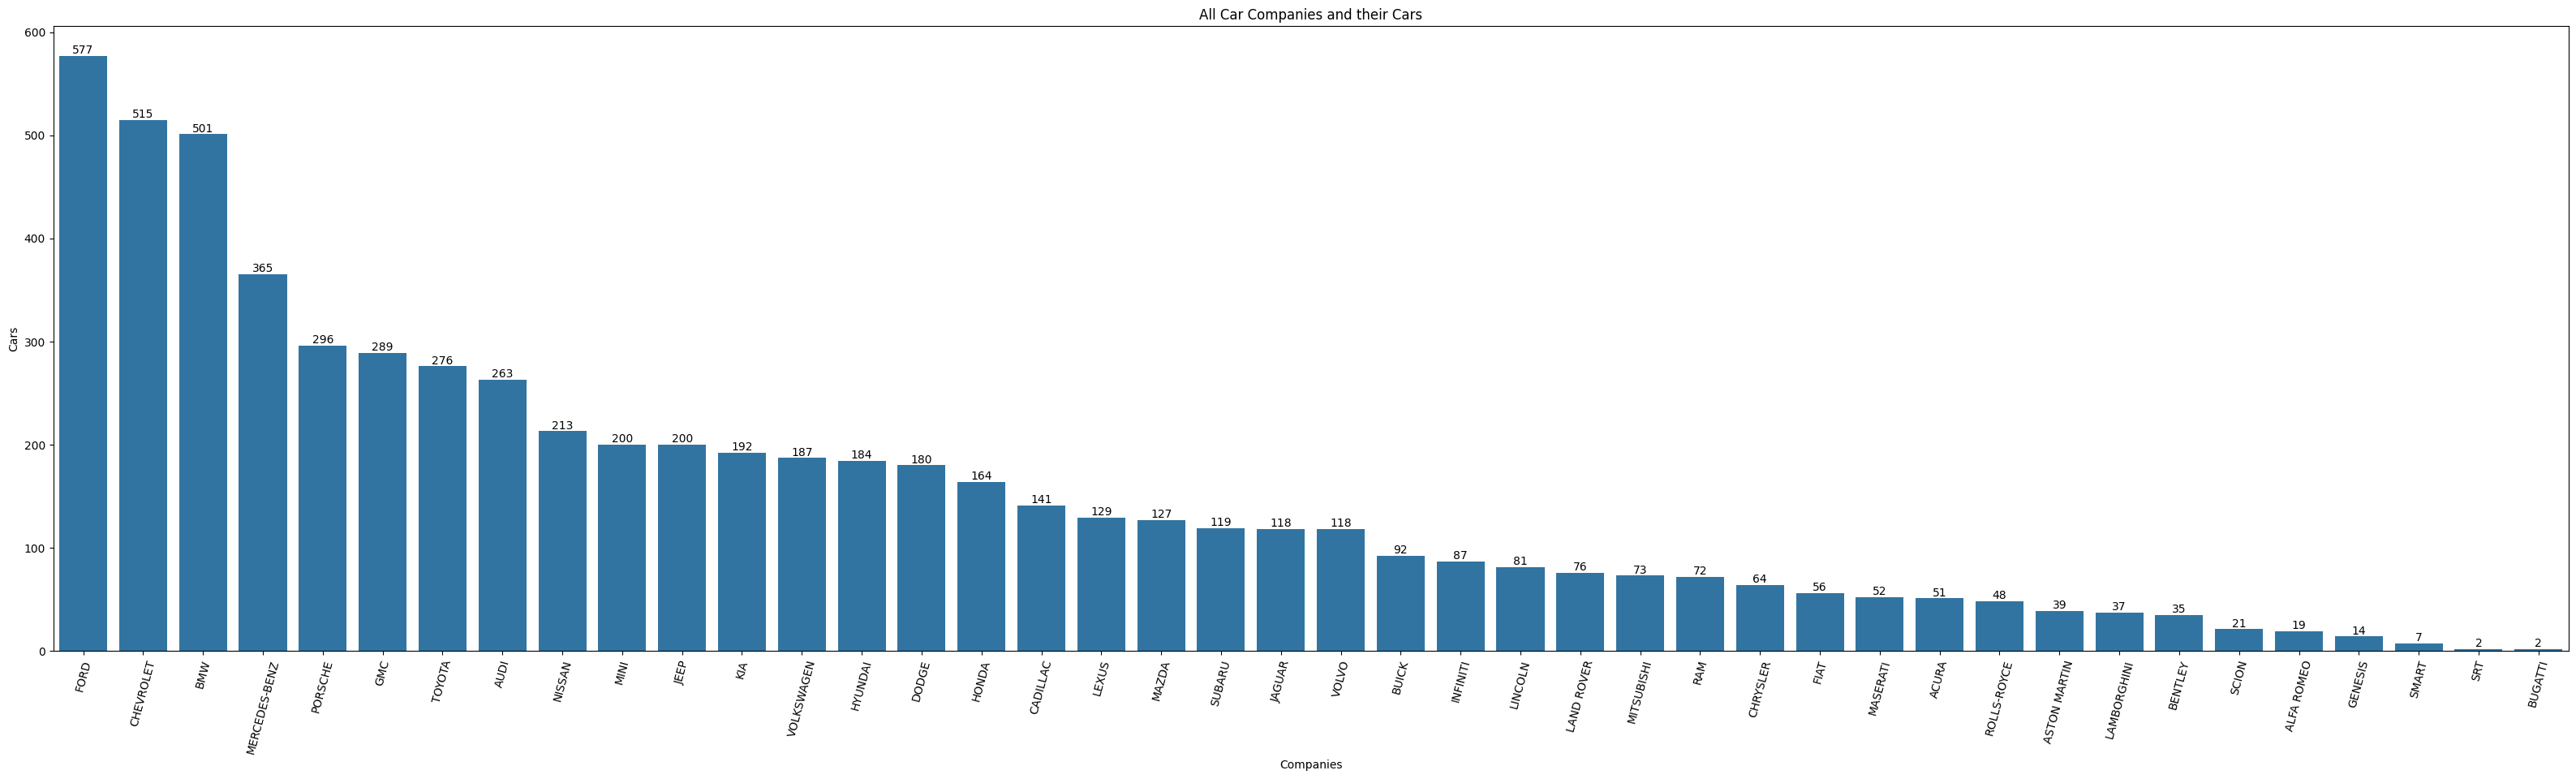

In [20]:
plt.figure(figsize=(40, 10))
figure1 = sns.barplot(data = df_brand, x = "Make",  y= "count")
plt.xticks(rotation = 75)
plt.title("All Car Companies and their Cars")
plt.xlabel("Companies")
plt.ylabel("Cars")
plt.bar_label(figure1.containers[0])
plt.show()

In [ ]:
#models of the cars
print("the total car models are", len(df['Model'].unique()))
df_model=df['Model'].value_counts().reset_index().reset_index()
df_model.head(20)

the total car models are 2053


,index,Model,count
0,0,F-150 FFV 4X4,32
1,1,F-150 FFV,32
2,2,MUSTANG,27
3,3,FOCUS FFV,24
4,4,SONIC,20
5,5,SONIC 5,20
6,6,F-150 4X4,20
7,7,F-150,20
8,8,ACCORD,19
9,9,COMPASS,19


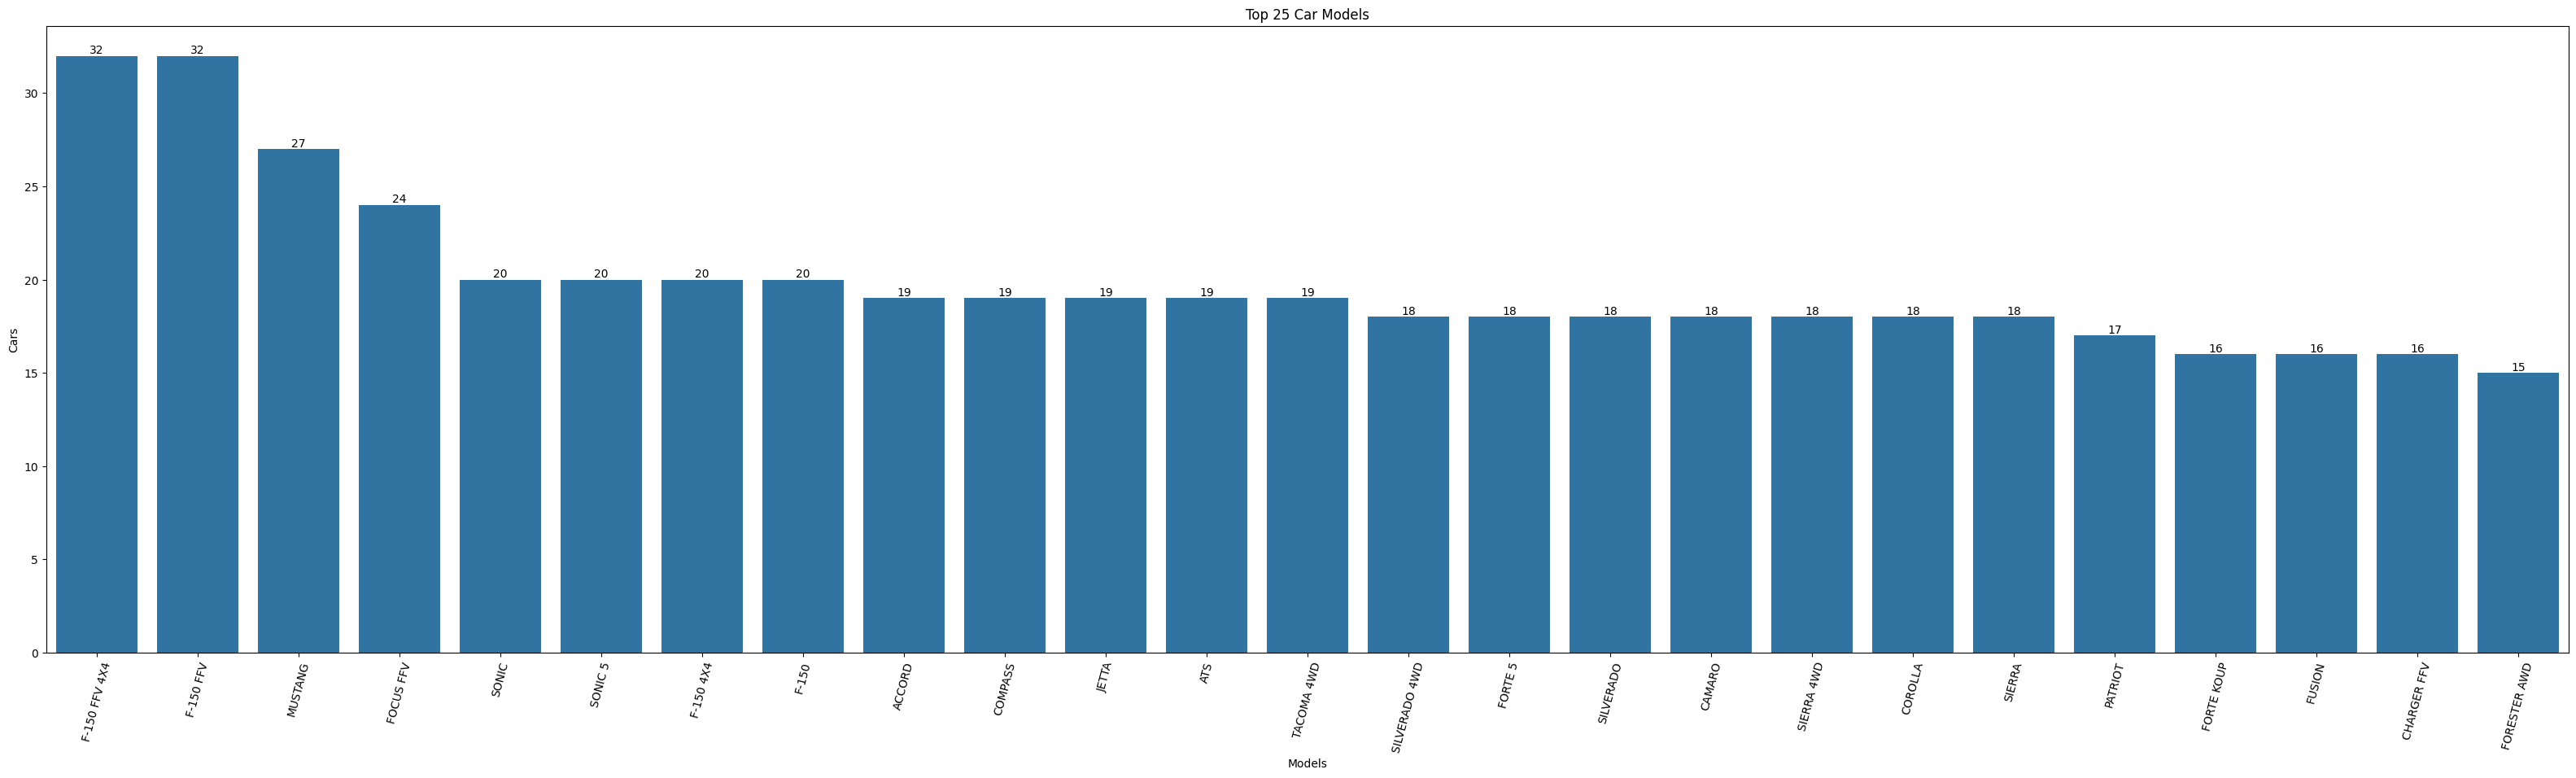

In [ ]:
top_25_models = df_model.sort_values(by='count', ascending=False).head(25)
plt.figure(figsize=(40, 10))
figure2 = sns.barplot(data=top_25_models, x="Model", y="count")
plt.xticks(rotation=75)
plt.title("Top 25 Car Models")
plt.xlabel("Models")
plt.ylabel("Cars")
plt.bar_label(figure2.containers[0])
plt.show()




In [22]:
print("we have total", len(df['Vehicle Class'].unique()),"Vehicles")
df_vehicle_class = df['Vehicle Class'].value_counts().reset_index()
df_vehicle_class

we have total 16 Vehicles


,Vehicle Class,count
0,SUV - SMALL,1006
1,MID-SIZE,983
2,COMPACT,903
3,SUV - STANDARD,613
4,SUBCOMPACT,533
5,FULL-SIZE,508
6,PICKUP TRUCK - STANDARD,475
7,TWO-SEATER,381
8,MINICOMPACT,274
9,STATION WAGON - SMALL,214


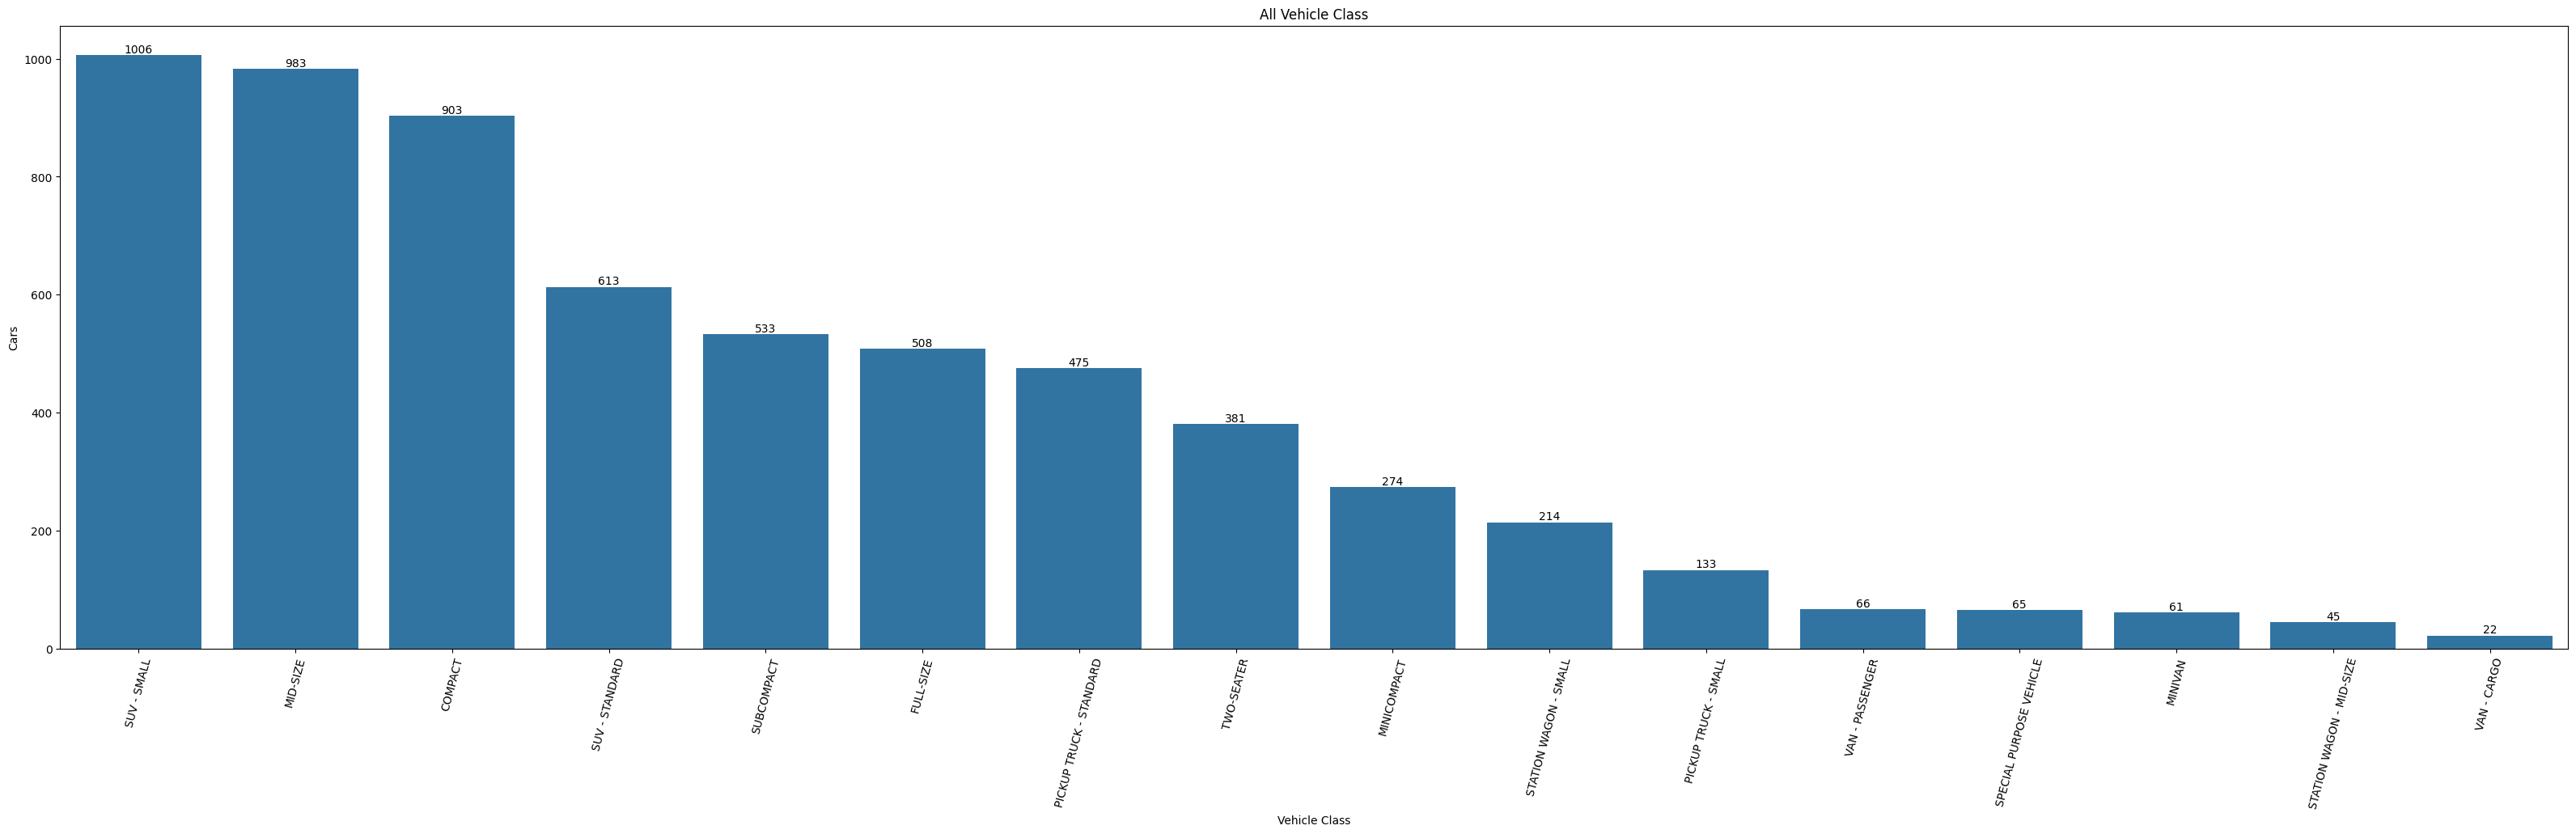

In [23]:
plt.figure(figsize=(40,10))
figure3 = sns.barplot(data = df_vehicle_class, x = "Vehicle Class",  y= "count")
plt.xticks(rotation = 75)
plt.title("All Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Cars")
plt.bar_label(figure3.containers[0])
plt.show()

In [24]:
print("Total number of engine size",len(df['Engine Size(L)'].unique()))
df_engine_size = df['Engine Size(L)'].value_counts().reset_index()
df_engine_size

Total number of engine size 51


,Engine Size(L),count
0,2.0,1260
1,3.0,687
2,3.6,433
3,3.5,431
4,2.5,355
5,2.4,287
6,1.6,272
7,5.3,240
8,1.8,191
9,5.0,179


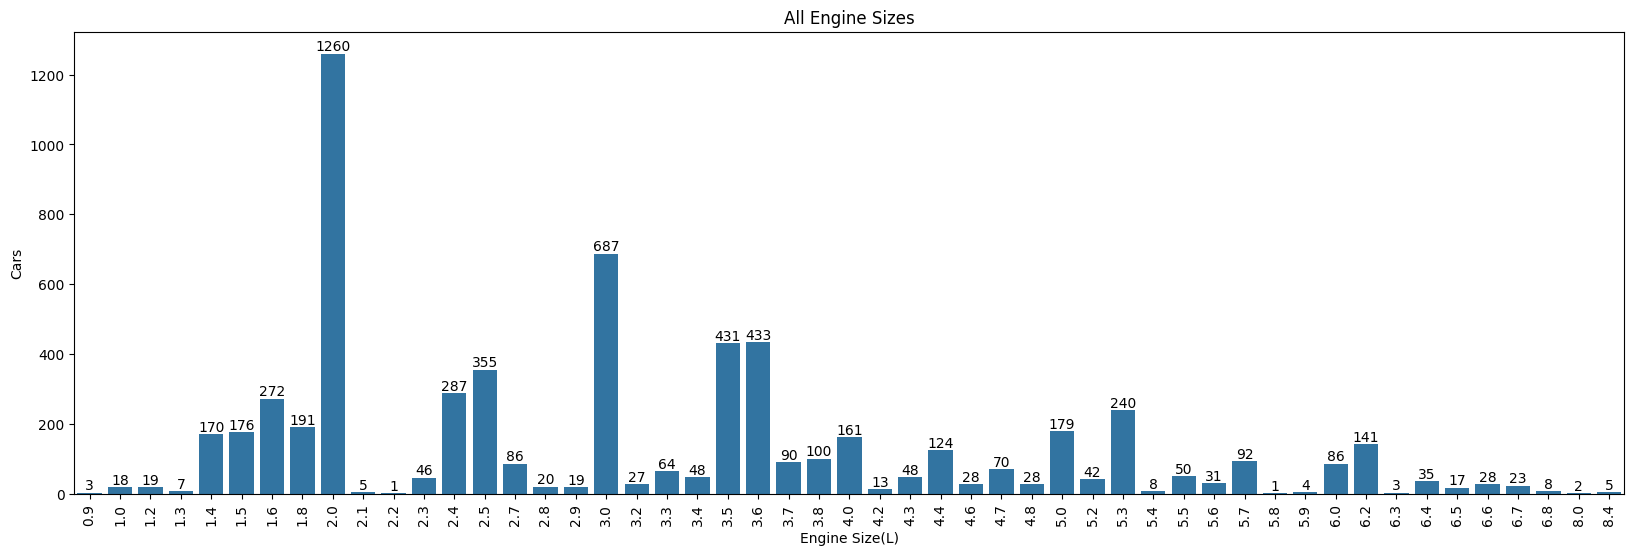

In [25]:
plt.figure(figsize=(20,6))
figure4 = sns.barplot(data = df_engine_size, x = "Engine Size(L)",  y= "count")
plt.xticks(rotation = 90)
plt.title("All Engine Sizes")
plt.xlabel("Engine Size(L)")
plt.ylabel("Cars")
plt.bar_label(figure4.containers[0])
plt.show()

In [26]:
print("total number of cylinders",len(df['Cylinders'].unique()))
df_cylinders = df['Cylinders'].value_counts().reset_index()
df_cylinders

total number of cylinders 8


,Cylinders,count
0,4,2749
1,6,2040
2,8,1202
3,12,135
4,3,88
5,10,40
6,5,26
7,16,2


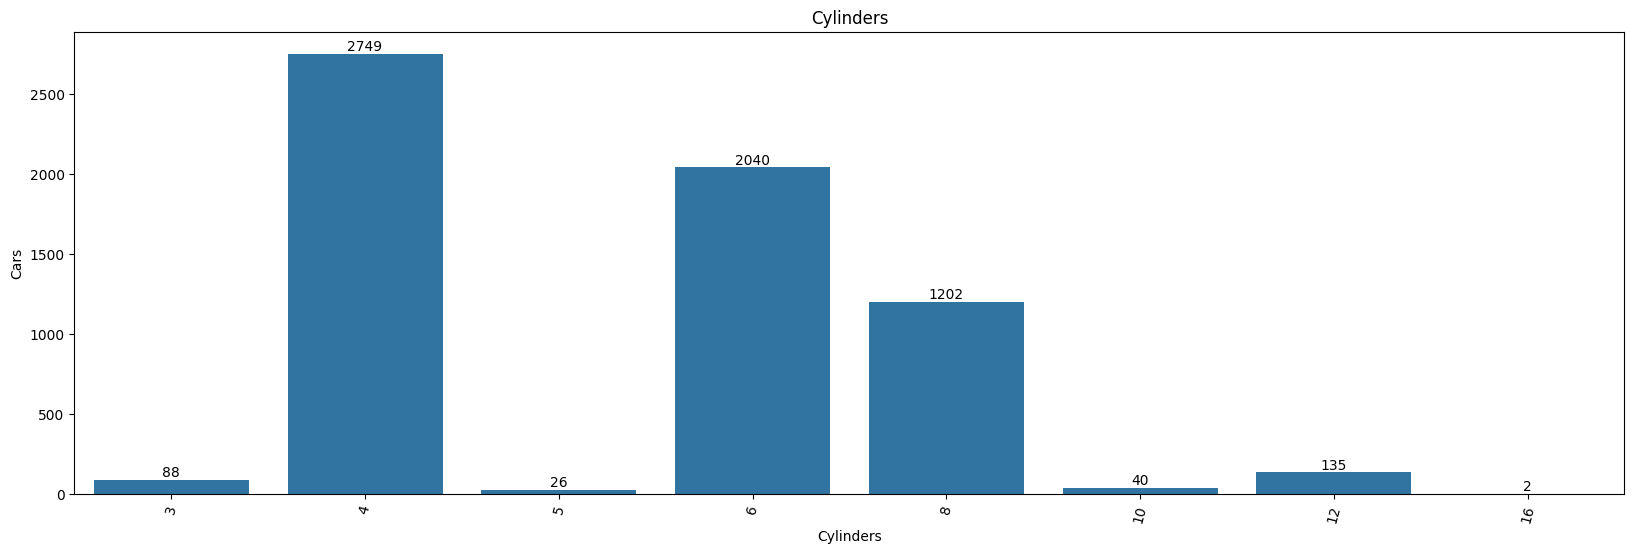

In [27]:
plt.figure(figsize=(20,6))
figure5 = sns.barplot(data = df_cylinders, x = "Cylinders",  y= "count")
plt.xticks(rotation = 75)
plt.title("Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("Cars")
plt.bar_label(figure5.containers[0])
plt.show()

In [28]:
df['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [29]:
print("Total transmission are: ",len(df['Transmission'].unique()))
df_transmission = df['Transmission'].value_counts().reset_index()
df_transmission

Total transmission are:  27


,Transmission,count
0,AS6,1139
1,AS8,1056
2,M6,773
3,A6,684
4,AM7,383
5,A8,378
6,AS7,283
7,A9,263
8,AV,241
9,M5,168


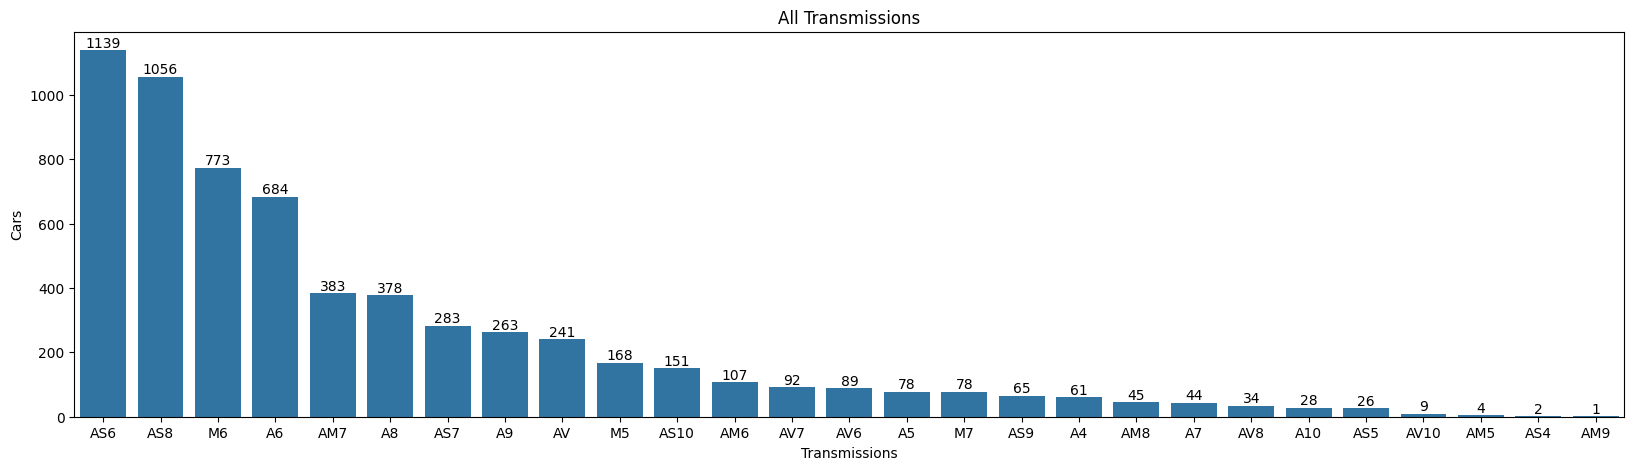

In [30]:
plt.figure(figsize=(20,5))
figure6 = sns.barplot(data = df_transmission, x = "Transmission",  y= "count")
plt.title("All Transmissions")
plt.xlabel("Transmissions")
plt.ylabel("Cars")
plt.bar_label(figure6.containers[0])
plt.show()

In [32]:
df['Fuel Type'].unique()


array(['Premium Gas', 'Diesel', 'Regular Gas', 'Ethanol(E85)',
       'Natural Gas'], dtype=object)

In [31]:
import numpy as np
df["Fuel Type"] = np.where(df["Fuel Type"]=="Z", "Premium Gas", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="X", "Regular Gas", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="D", "Diesel", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="E", "Ethanol(E85)", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="N", "Natural Gas", df["Fuel Type"])

In [33]:
print("Total Fuel Types are: ",len(df['Fuel Type'].unique()))
df_fuel_type = df['Fuel Type'].value_counts().reset_index()
df_fuel_type

Total Fuel Types are:  5


,Fuel Type,count
0,Regular Gas,3039
1,Premium Gas,2765
2,Ethanol(E85),330
3,Diesel,147
4,Natural Gas,1


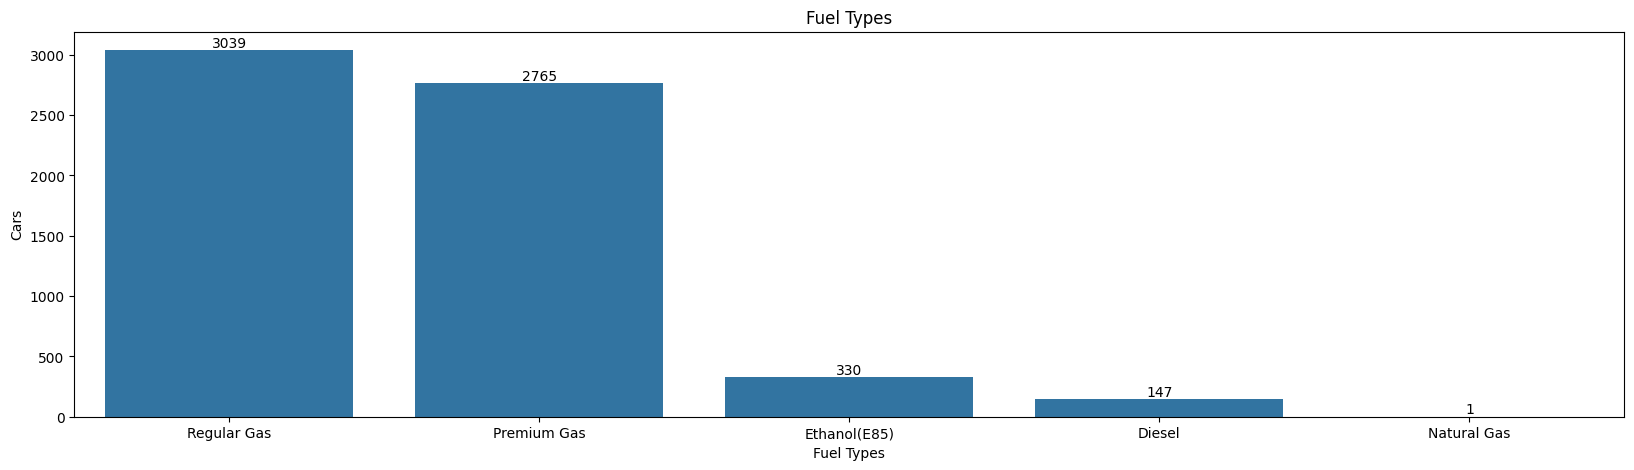

In [34]:
plt.figure(figsize=(20,5))
figure7 = sns.barplot(data = df_fuel_type, x = "Fuel Type",  y= "count")
plt.title("Fuel Types")
plt.xlabel("Fuel Types")
plt.ylabel("Cars")
plt.bar_label(figure7.containers[0])
plt.show()

In [35]:
#graph of co2 emission released wrt brand
df_bc=df.groupby(['Make'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()
df_bc.head(10)

,Make,CO2 Emissions(g/km)
0,SMART,151.428571
1,HONDA,191.262195
2,FIAT,192.285714
3,MAZDA,192.755906
4,MINI,196.570000
5,MITSUBISHI,200.095890
6,SCION,200.809524
7,HYUNDAI,207.929348
8,VOLKSWAGEN,209.844920
9,KIA,213.796875


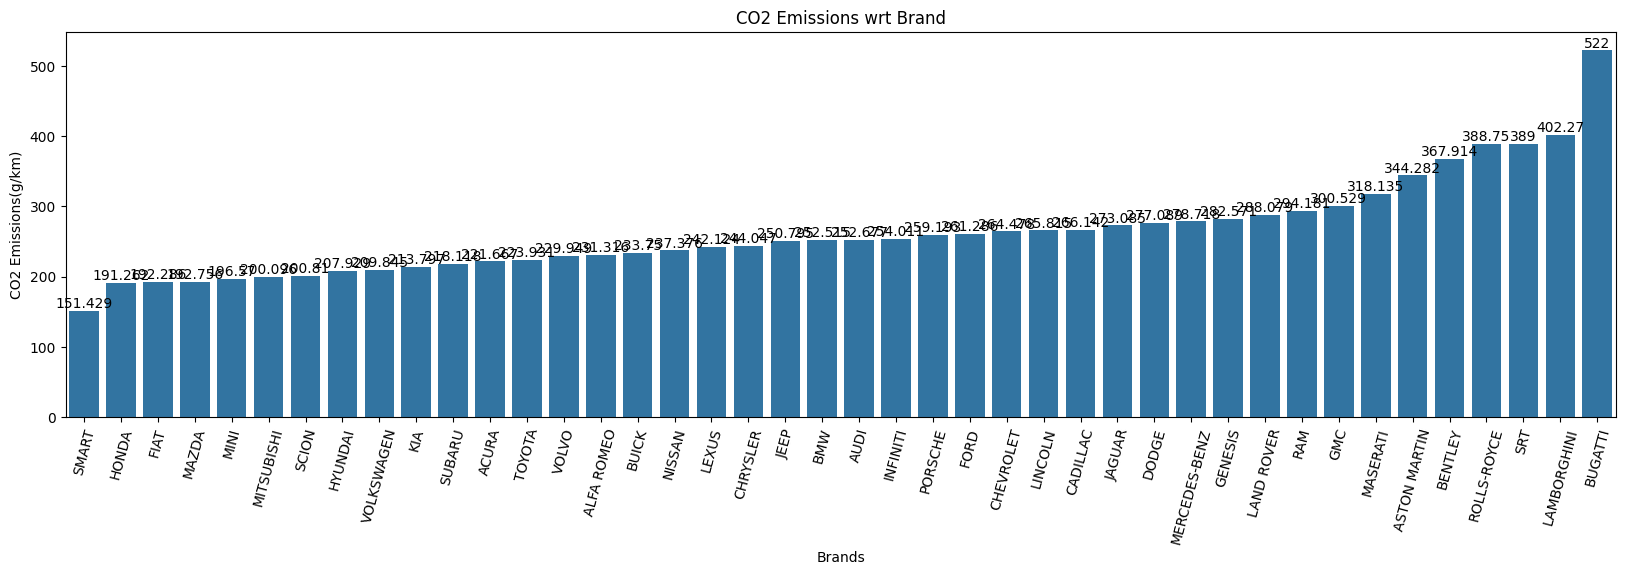

In [36]:
plt.figure(figsize=(20,5))
figure8 = sns.barplot(data = df_bc, x = "Make",y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 75)
plt.title("CO2 Emissions wrt Brand")
plt.xlabel("Brands")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure8.containers[0])
plt.show()


In [37]:
df_vc= df.groupby(['Vehicle Class'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()
df_vc.head(10)

,Vehicle Class,CO2 Emissions(g/km)
0,STATION WAGON - SMALL,202.686916
1,COMPACT,217.641196
2,MID-SIZE,222.292981
3,SUV - SMALL,236.413519
4,MINICOMPACT,236.675182
5,SPECIAL PURPOSE VEHICLE,237.815385
6,STATION WAGON - MID-SIZE,240.755556
7,SUBCOMPACT,244.568480
8,MINIVAN,261.114754
9,FULL-SIZE,264.407480


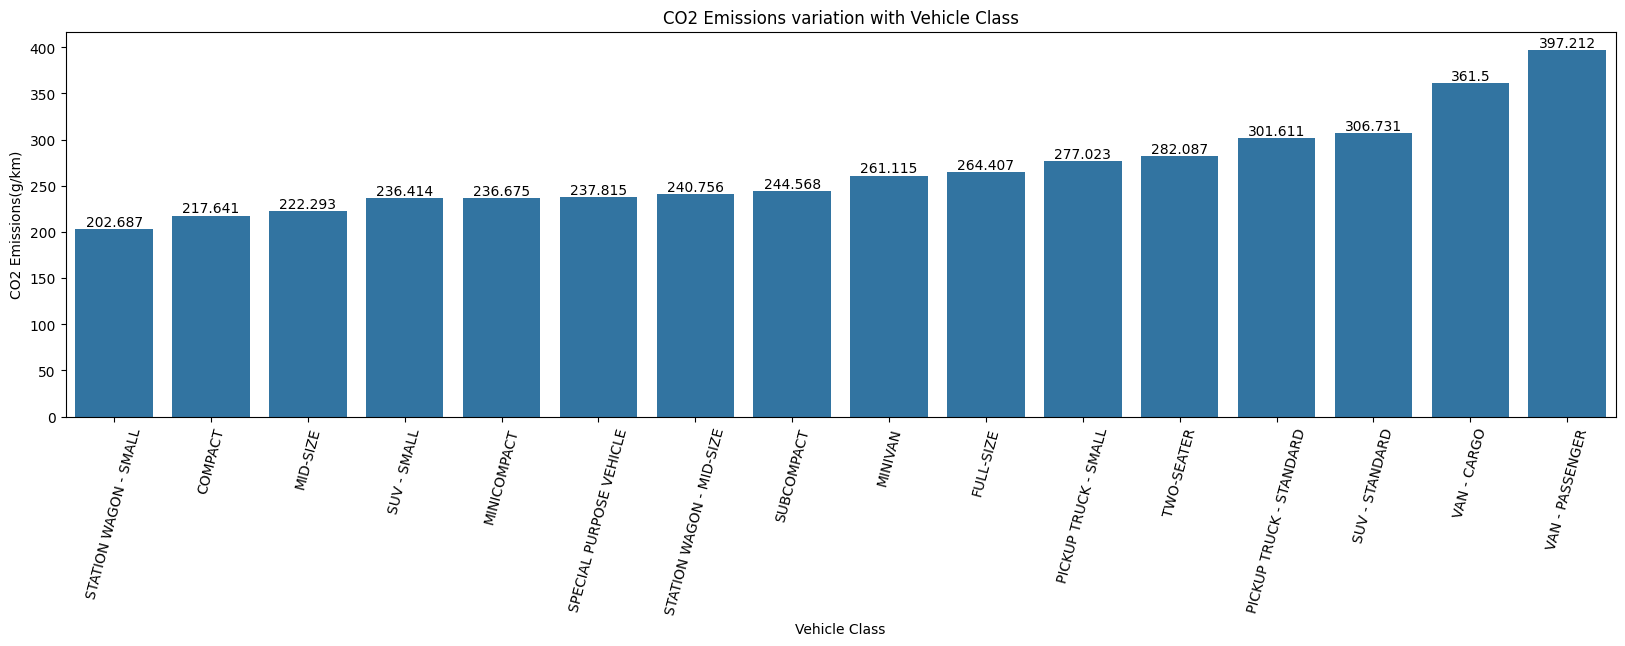

In [38]:
plt.figure(figsize=(20,5))
figure9 = sns.barplot(data = df_vc, x = "Vehicle Class",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 75)
plt.title("CO2 Emissions variation with Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure9.containers[0])
plt.show()

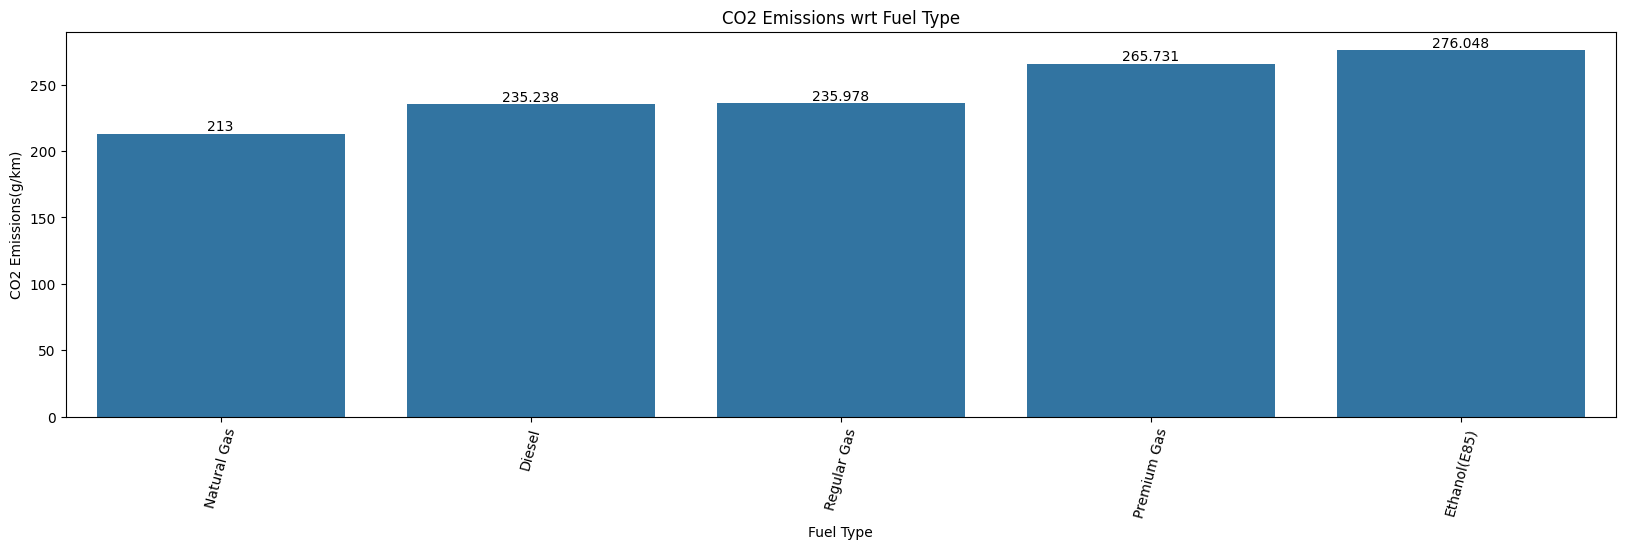

In [39]:
df_cf = df.groupby(['Fuel Type'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()
plt.figure(figsize=(20,5))
figure11 = sns.barplot(data = df_cf, x = "Fuel Type",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 75)
plt.title("CO2 Emissions wrt Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure11.containers[0])
plt.show()

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Density'>

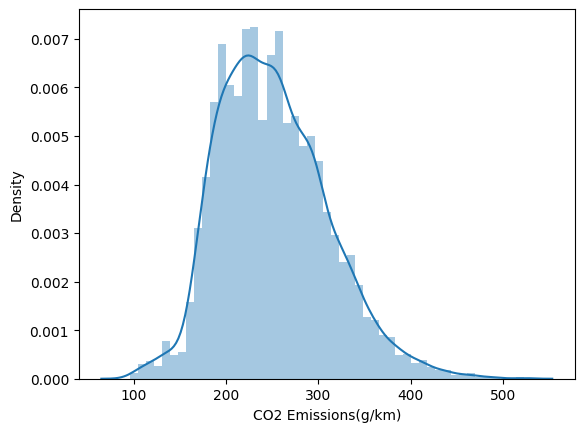

In [40]:
sns.distplot(df['CO2 Emissions(g/km)'])

<Axes: xlabel='Fuel Consumption Comb (L/100 km)', ylabel='Density'>

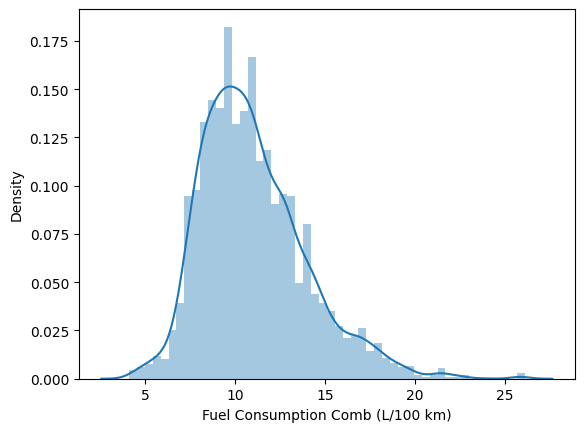

In [41]:
sns.distplot(df['Fuel Consumption Comb (L/100 km)'])

<Axes: xlabel='Fuel Consumption Hwy (L/100 km)', ylabel='Density'>

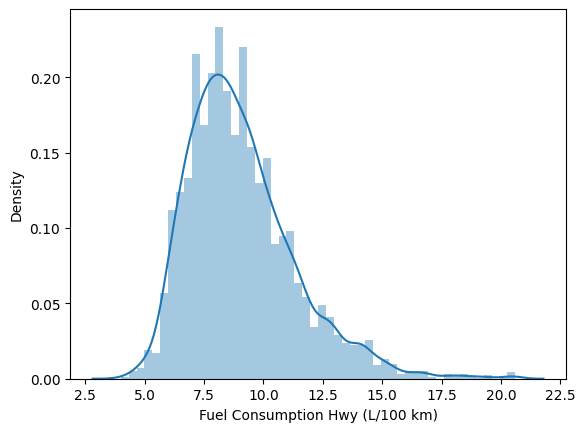

In [42]:
sns.distplot(df['Fuel Consumption Hwy (L/100 km)'])

<Axes: xlabel='Fuel Consumption Comb (mpg)', ylabel='Density'>

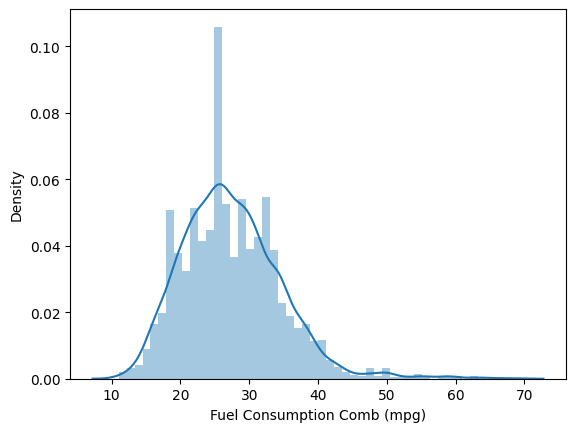

In [43]:

sns.distplot(df['Fuel Consumption Comb (mpg)'])

In [44]:
df_check = df['Fuel Type'].value_counts().reset_index()
df_check


,Fuel Type,count
0,Regular Gas,3039
1,Premium Gas,2765
2,Ethanol(E85),330
3,Diesel,147
4,Natural Gas,1


In [45]:
df.drop(['Make','Model','Vehicle Class','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Transmission','Fuel Consumption Comb (mpg)'],inplace=True,axis=1)

In [46]:
df.head(10)

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,Premium Gas,8.5,196
1,2.4,4,Premium Gas,9.6,221
2,1.5,4,Premium Gas,5.9,136
3,3.5,6,Premium Gas,11.1,255
4,3.5,6,Premium Gas,10.6,244
5,3.5,6,Premium Gas,10.0,230
6,3.5,6,Premium Gas,10.1,232
7,3.7,6,Premium Gas,11.1,255
8,3.7,6,Premium Gas,11.6,267
9,2.4,4,Premium Gas,9.2,212


In [47]:
df_correlation = df[['Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]
df_correlation.head()


,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [48]:
df_correlation.corr().T

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.928843,0.820146,0.854802
Cylinders,0.928843,1.000000,0.781099,0.834687
Fuel Consumption Comb (L/100 km),0.820146,0.781099,1.000000,0.916840
CO2 Emissions(g/km),0.854802,0.834687,0.916840,1.000000


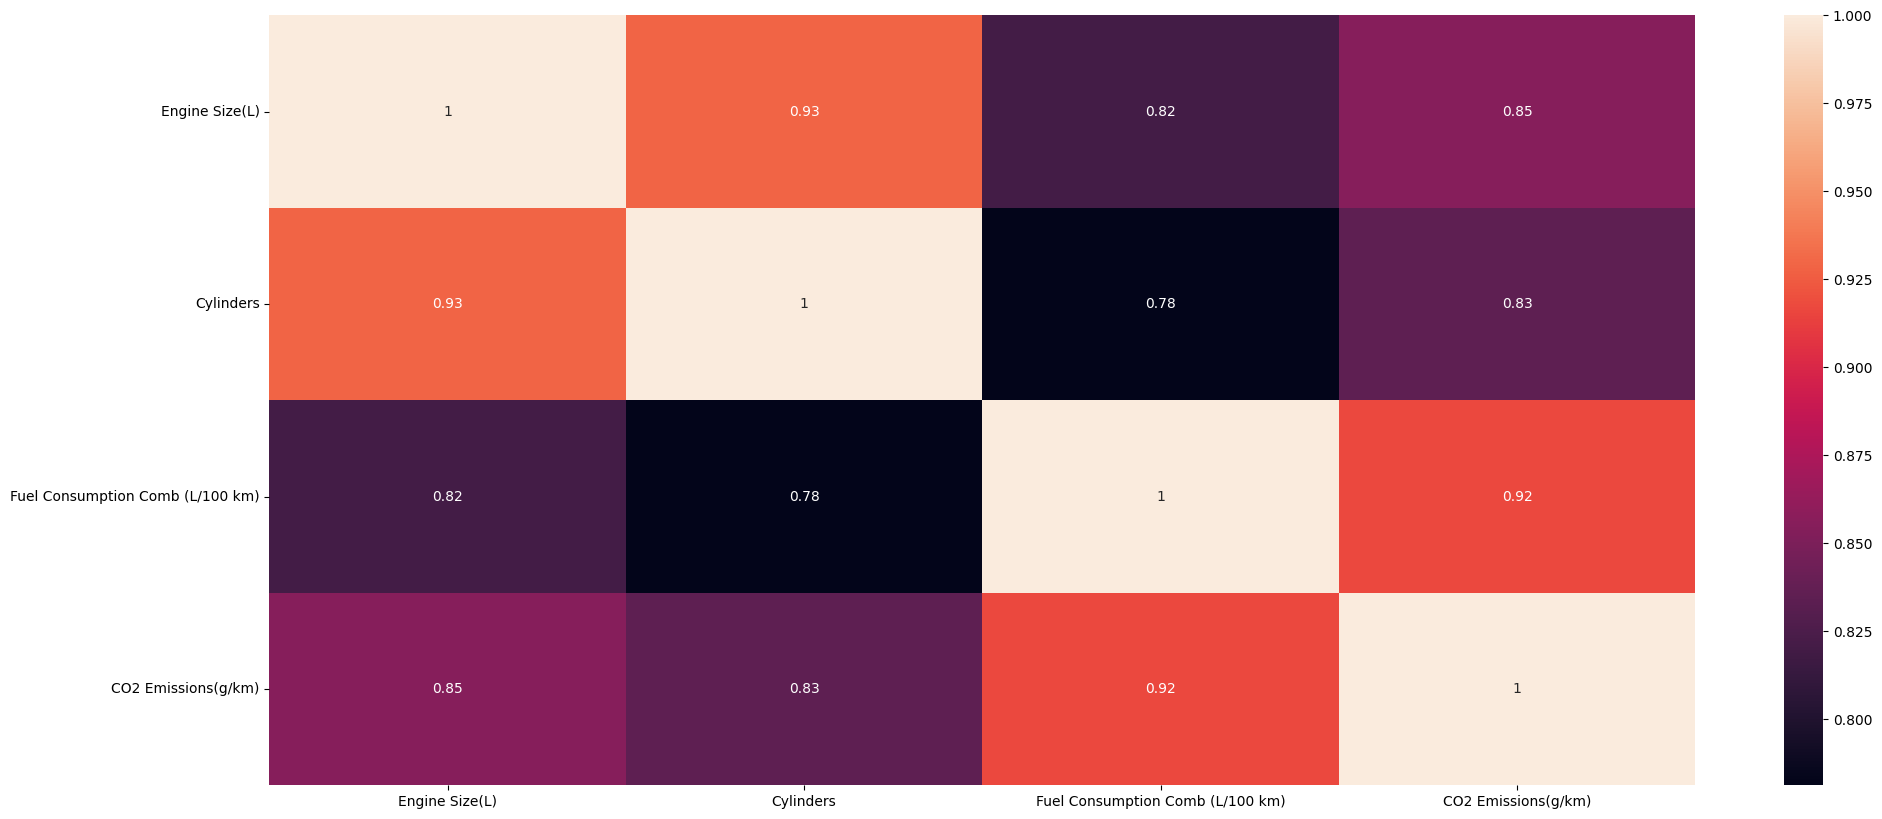

In [53]:
plt.figure(figsize = (23,10))
sns.heatmap(df_correlation.corr(), annot = True)
plt.show()


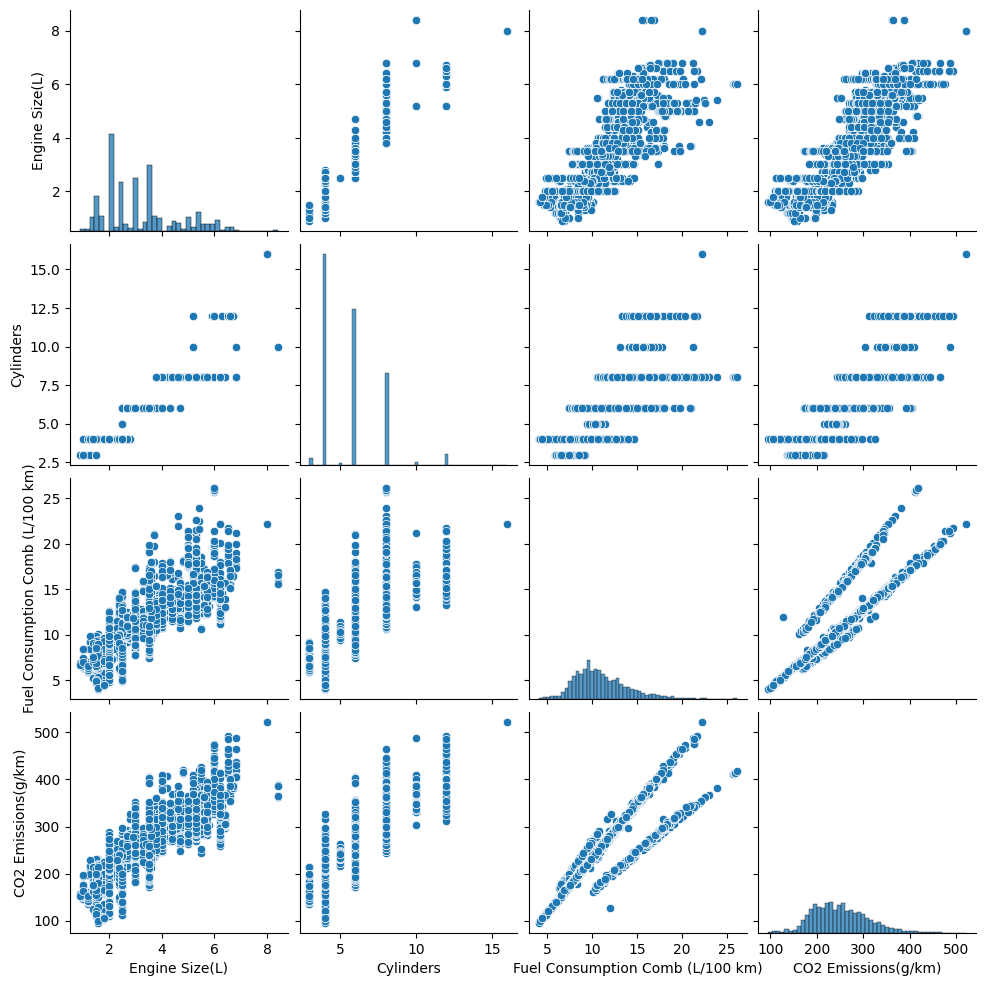

In [49]:
sns.pairplot(df_correlation)

# **Removing outliners as they cause discrepency in measuring**

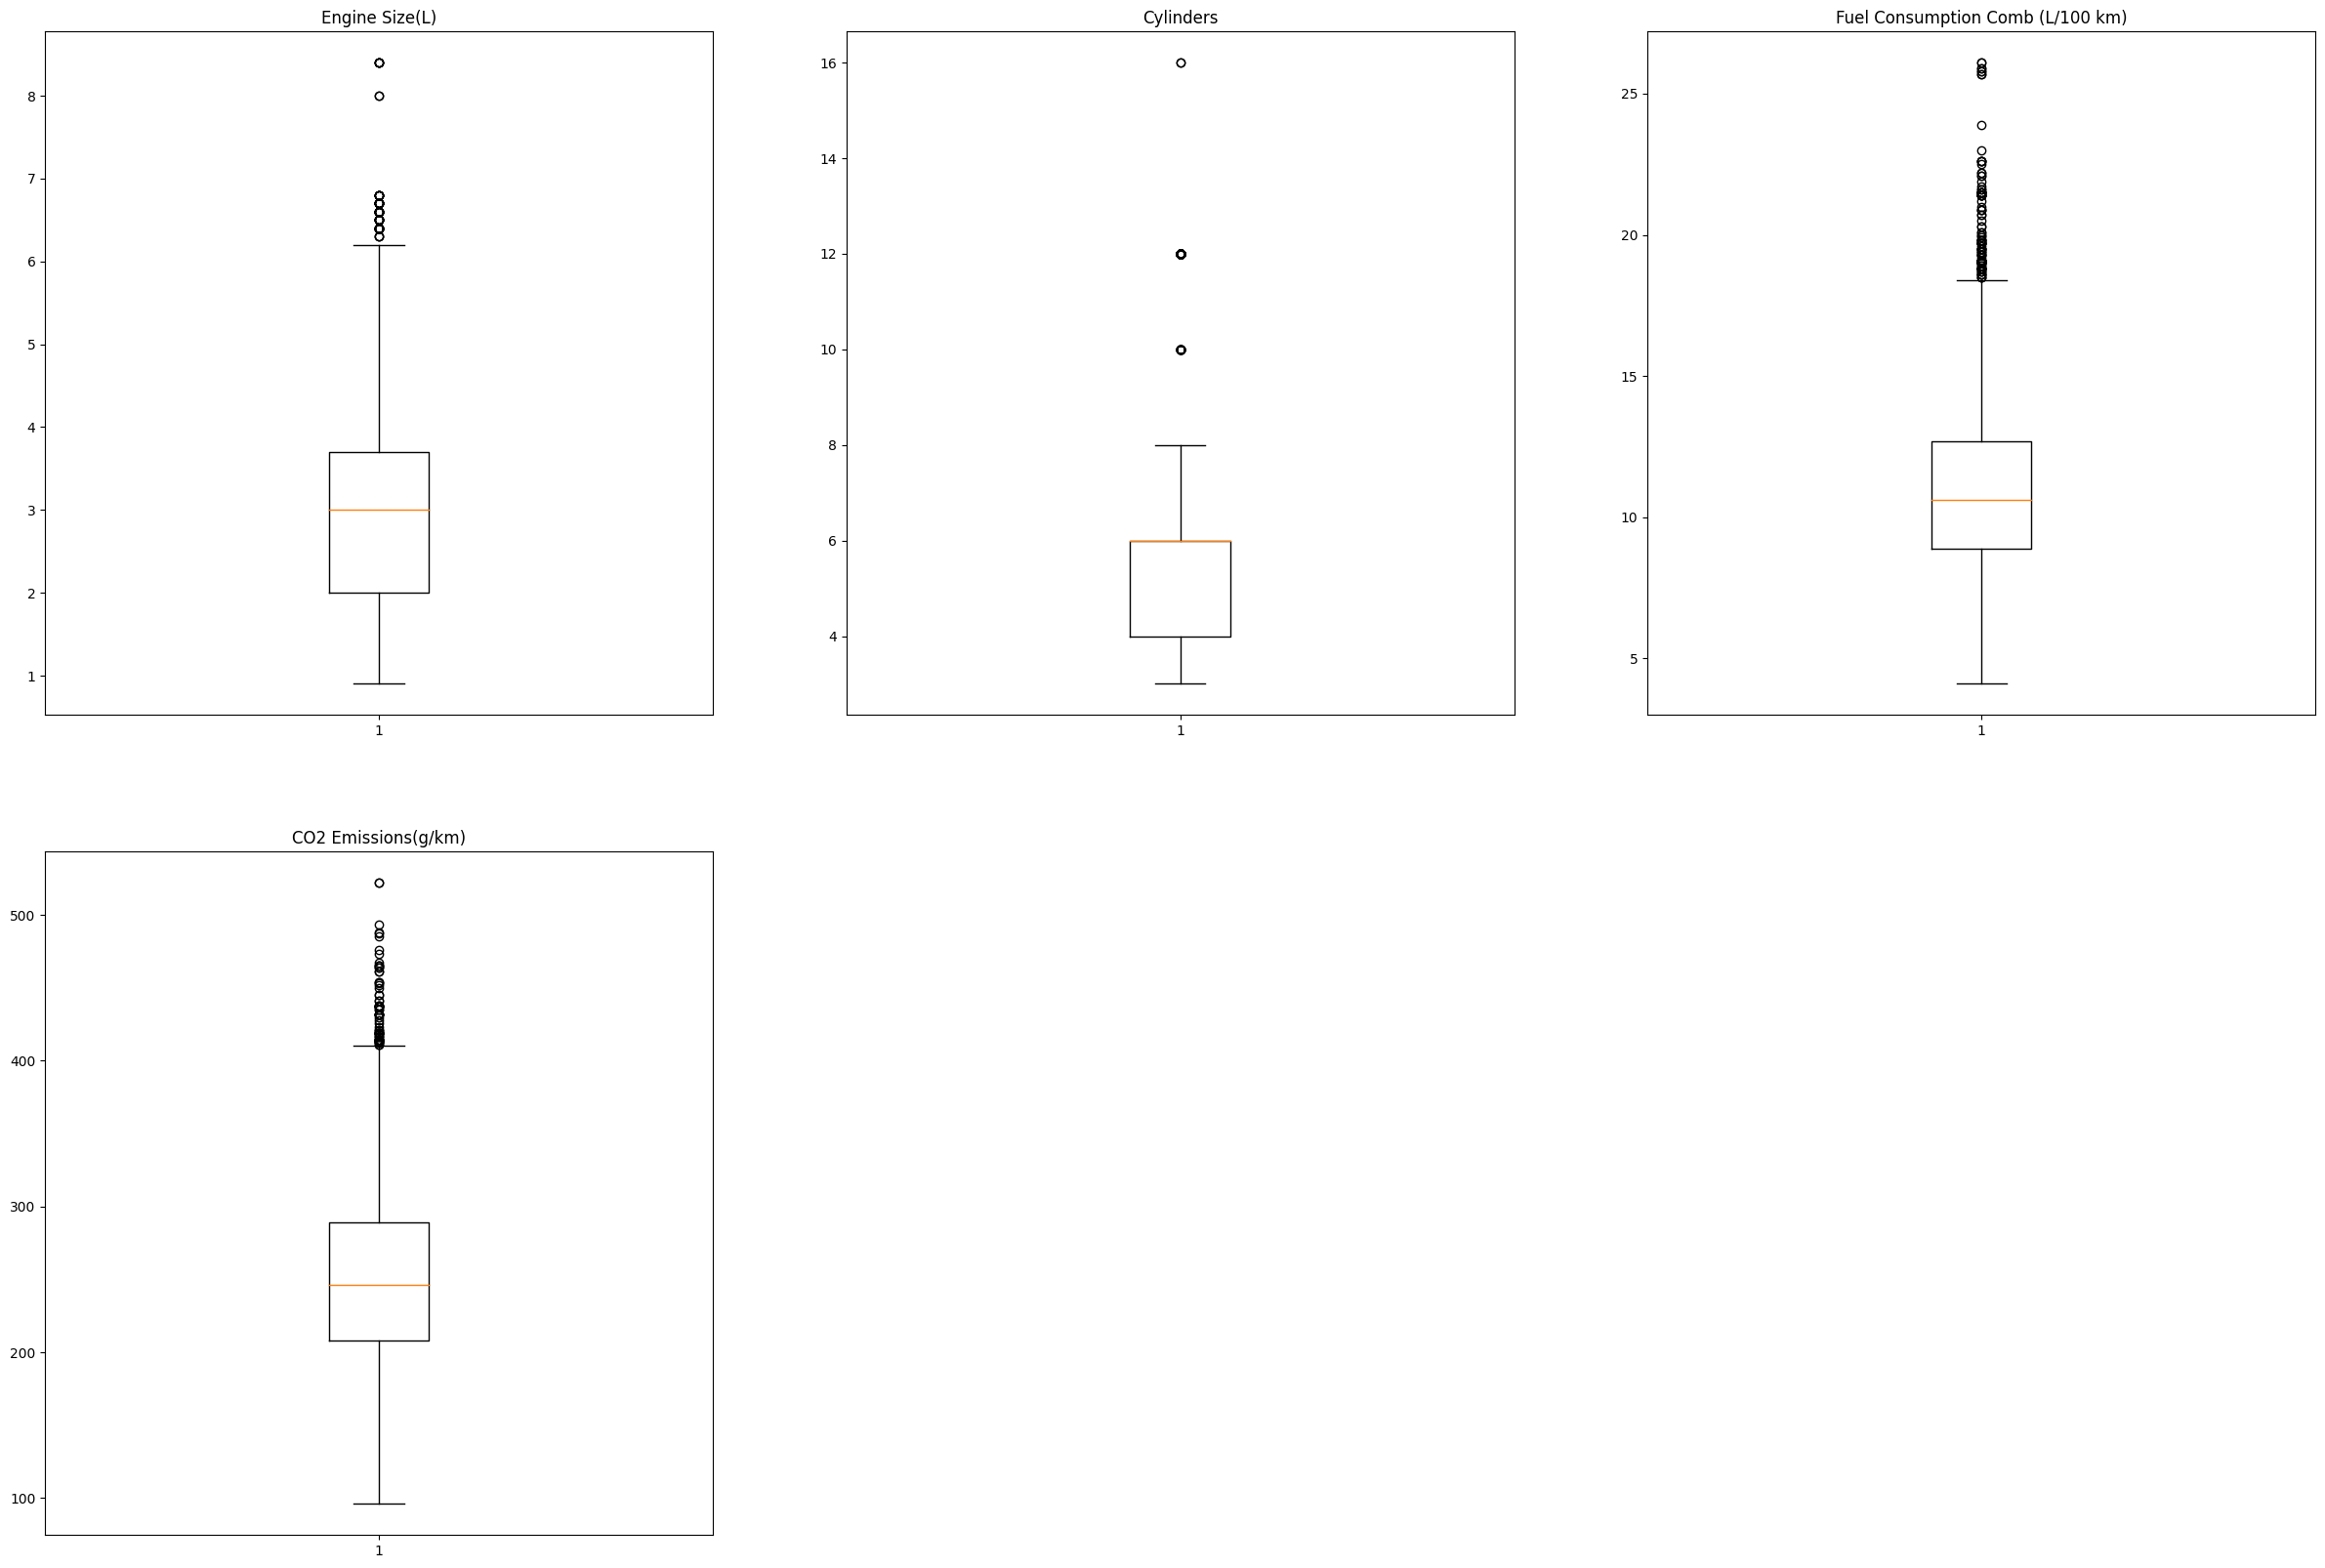

In [50]:
plt.figure(figsize = (30,20))
for i in enumerate(df_correlation):
    plt.subplot(2,3,i[0]+1)
    plt.title(i[1])
    plt.boxplot(df_correlation[i[1]])

In [54]:
#removing the outliers
df_new = df_correlation[(z < 1.9).all(axis=1)]

In [52]:
z = np.abs(stats.zscore(df_correlation))

In [55]:
df_new.reset_index(drop=True, inplace=True)

In [56]:
print("The length of the original : " , len(df))
print("Length after removing the outliers : " , len(df_new))
print("Removed",len(df)-len(df_new),"Outliers")

The length of the original :  6282
Length after removing the outliers :  5527
Removed 755 Outliers


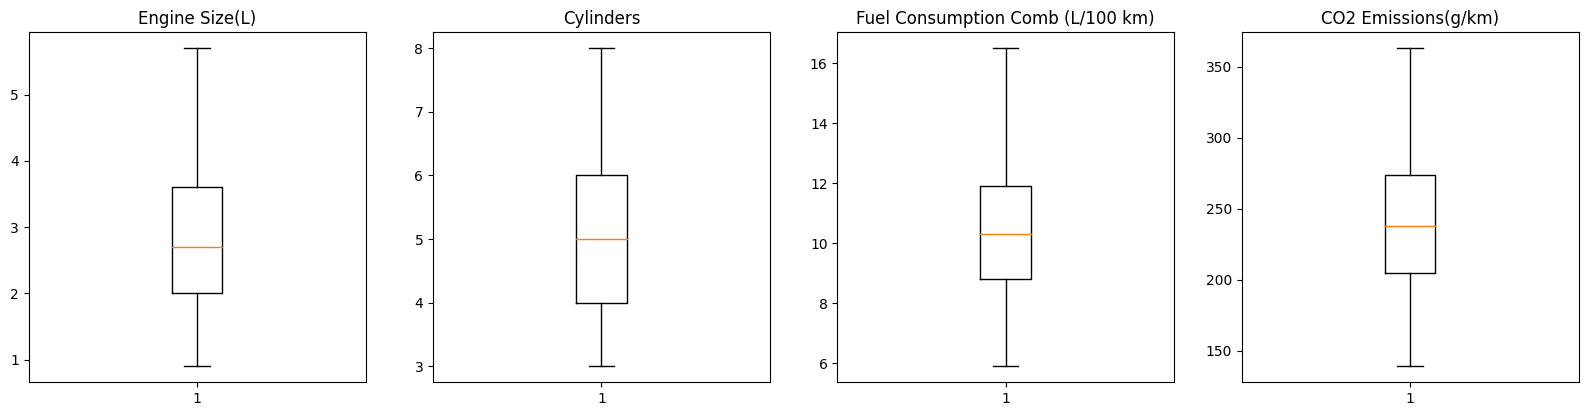

In [57]:
plt.figure(figsize = (20,10))
for i in enumerate(df_new):
    plt.subplot(2,4,i[0]+1)
    plt.title(i[1])
    plt.boxplot(df_new[i[1]])

In [58]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),5527.0,2.882540,1.081857,0.9,2.0,2.7,3.6,5.7
Cylinders,5527.0,5.267234,1.445618,3.0,4.0,5.0,6.0,8.0
Fuel Consumption Comb (L/100 km),5527.0,10.443423,2.115138,5.9,8.8,10.3,11.9,16.5
CO2 Emissions(g/km),5527.0,241.728062,46.898922,139.0,205.0,238.0,274.0,363.0


In [59]:
sample_df=df_new.sample(n=200,random_state=28)
sample_df

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
3226,3.3,6,11.4,270
3127,1.6,4,8.0,188
4802,4.7,8,15.1,355
4633,2.0,4,9.8,229
4634,2.4,4,9.8,230
...,...,...,...,...
5368,3.6,6,11.8,276
1866,2.0,4,10.3,240
1270,2.0,4,10.4,239
3571,2.0,4,9.5,221


In [60]:
indexs=sample_df.index

In [61]:
for i in indexs:
    df_new.drop(i, axis = 0,inplace = True)

In [62]:
#not needed
sample_df_Xtest=sample_df.drop(['CO2 Emissions(g/km)'],axis=1) #contains everything but co2 emission
sample_df_ytest=sample_df["CO2 Emissions(g/km)"]#contains only co2 emissions

In [63]:
#not needed
new=sample_df_Xtest.astype(np.float32)
sample_df_Xtest = (new - np.min(new)) / (np.max(new) - np.min(new))
sample_df_Xtest["Engine Size(L)"]=sample_df_Xtest["Engine Size(L)"].map(lambda x:round(x,2))
sample_df_Xtest["Cylinders"]=sample_df_Xtest["Cylinders"].map(lambda x:round(x,2))
sample_df_Xtest["Fuel Consumption Comb (L/100 km)"]=sample_df_Xtest["Fuel Consumption Comb (L/100 km)"].map(lambda x:round(x,2))
sample_df_Xtest.head(10)

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km)
3226,0.15,0.35,0.73
3127,0.03,0.20,0.49
4802,0.25,0.49,1.00
4633,0.06,0.20,0.62
4634,0.09,0.20,0.62
4447,0.17,0.35,0.78
802,0.06,0.20,0.53
75,0.06,0.20,0.52
3142,0.17,0.35,0.67
2949,0.01,0.20,0.48


In [64]:
X = df_new.drop(['CO2 Emissions(g/km)'], axis= 1).astype(np.float32)
y = df_new["CO2 Emissions(g/km)"].astype(np.float32)
# Normalize
X = (X - np.min(X)) / (np.max(X) - np.min(X))
X["Engine Size(L)"]=X["Engine Size(L)"].map(lambda x:round(x,2))
X["Cylinders"]=X["Cylinders"].map(lambda x:round(x,2))
X["Fuel Consumption Comb (L/100 km)"]=X["Fuel Consumption Comb (L/100 km)"].map(lambda x:round(x,2))
X.head(10)

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km)
0,0.07,0.20,0.49
1,0.10,0.20,0.56
2,0.17,0.33,0.65
3,0.17,0.33,0.62
4,0.17,0.33,0.58
5,0.17,0.33,0.59
6,0.18,0.33,0.65
7,0.18,0.33,0.69
8,0.10,0.20,0.53
9,0.10,0.20,0.57


In [65]:
X.shape

(5327, 3)

In [66]:
y.shape

(5327,)

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=20)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)


X_train (3196, 3)
y_train (3196,)
X_test (2131, 3)
y_test (2131,)


# **ML PREDICTION MODEL**

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# **LINEAR REGRESSION**

In [72]:
def train_linear_regression_model(X_train, y_train):
  model = LinearRegression().fit(X_train, y_train)
  return model

In [74]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r_train = model.score(X_train, y_train)
    lin_r_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse, test_rmse, r_train, lin_r_score

In [80]:
def predict_and_compare(model, sample_df_Xtest, sample_df_ytest):
    try:
        linear_regression_pred = model.predict(sample_df_Xtest)
        mean_diff = (sample_df_ytest - linear_regression_pred).mean()
    except KeyError as e:
        print(f"KeyError: {e}")
        return None, None
    except Exception as e:
        print(f"Unexpected error: {e}")
        return None, None

    return linear_regression_pred, mean_diff

In [85]:

if __name__ == "__main__":
    # Assuming X_train, y_train, X_test, y_test, sample_df_Xtest, and sample_df_ytest are defined
    model = train_linear_regression_model(X_train, y_train)
    train_rmse, test_rmse, r_train, lin_r_score = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")
    print(f"R^2 score on Training Data: {r_train}")
    print(f"Cross-validated R^2 score: {lin_r_score}")

    # Ensure sample_df_Xtest and sample_df_ytest are pandas DataFrames with the correct structure
    if not isinstance(sample_df_Xtest, pd.DataFrame):
        raise ValueError("sample_df_Xtest must be a pandas DataFrame")
    if not isinstance(sample_df_ytest, pd.Series):
        raise ValueError("sample_df_ytest must be a pandas Series")

    linear_regression_pred, mean_diff = predict_and_compare(model, sample_df_Xtest, sample_df_ytest)

    if linear_regression_pred is not None and mean_diff is not None:
        print(f"Mean Difference: {mean_diff}")
        print("First 10 predictions:", linear_regression_pred[:10])

Training RMSE: 14.223626934325248
Testing RMSE: 14.95034140903213
R^2 score on Training Data: 0.9087748440278901
Cross-validated R^2 score: 0.9082884229324092
Mean Difference: -16.796624173571004
First 10 predictions: [279.84962443 198.73641799 367.64836113 235.69160699 236.99608288
 294.43108776 211.01034407 208.26798152 264.26509974 195.12440485]


# **KNN**

In [86]:
def train_knn_model(X_train, y_train):
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)
    return model

In [87]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r_train = model.score(X_train, y_train)
    knn_r_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse, test_rmse, r_train, knn_r_score


In [88]:
def predict_and_compare(model, sample_df_Xtest, sample_df_ytest):
    pred = model.predict(sample_df_Xtest)
    result_pred = pd.DataFrame({"Pred_KNN": pred, "Real_Value": sample_df_ytest.values})
    result_pred["Pred_KNN"] = result_pred["Pred_KNN"].map(lambda x:round(x,2))
    result_pred["Diff"] = result_pred["Pred_KNN"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

In [89]:
if __name__ == "__main__":
    # Assuming X_train, y_train, X_test, y_test, sample_df_Xtest, and sample_df_ytest are defined
    model = train_knn_model(X_train, y_train)
    train_rmse, test_rmse, r_train, knn_r_score = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")
    print(f"R^2 score on Training Data: {r_train}")
    print(f"Cross-validated R^2 score: {knn_r_score}")
    knn_pred, mean_diff = predict_and_compare(model, sample_df_Xtest, sample_df_ytest)
    print(f"Mean Difference: {mean_diff}")

Training RMSE: 8.748750686645508
Testing RMSE: 9.631821632385254
R^2 score on Training Data: 0.9654867383146477
Cross-validated R^2 score: 0.9547736123000725
Mean Difference: 19.326


In [90]:
knn_pred.head(20)

,Pred_KNN,Real_Value,Diff
0,292.0,270,22.0
1,198.6,188,10.6
2,358.0,355,3.0
3,247.0,229,18.0
4,246.4,230,16.4
5,303.8,281,22.8
6,212.8,196,16.8
7,209.6,193,16.6
8,264.2,246,18.2
9,194.4,185,9.4


# **RANDOM FOREST**

In [91]:
def train_random_forest_model(X_train, y_train):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    return model

In [92]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train = model.score(X_train, y_train)
    rf_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse, test_rmse, r2_train, rf_r2_score

In [93]:
def predict_and_compare(model, sample_df_Xtest, sample_df_ytest):
    pred = model.predict(sample_df_Xtest)
    result_pred = pd.DataFrame({"Pred_RF": pred, "Real_Value": sample_df_ytest.values})
    result_pred["Pred_RF"] = result_pred["Pred_RF"].round(2)
    result_pred["Diff"] = result_pred["Pred_RF"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

In [94]:
if __name__ == "__main__":
    # Assuming X_train, y_train, X_test, y_test, sample_df_Xtest, and sample_df_ytest are defined
    model = train_random_forest_model(X_train, y_train)
    train_rmse, test_rmse, r2_train, rf_r2_score = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")
    print(f"R^2 score on Training Data: {r2_train}")
    print(f"Cross-validated R^2 score: {rf_r2_score}")
    random_forest_pred, mean_diff = predict_and_compare(model, sample_df_Xtest, sample_df_ytest)
    print(f"Mean Difference: {mean_diff}")

Training RMSE: 7.8748360859408475
Testing RMSE: 9.18679087062565
R^2 score on Training Data: 0.9720374383642145
Cross-validated R^2 score: 0.956941463210143
Mean Difference: 19.38855


In [95]:
random_forest_pred.head(20)

,Pred_RF,Real_Value,Diff
0,285.34,270,15.34
1,198.58,188,10.58
2,332.20,355,-22.80
3,241.64,229,12.64
4,246.54,230,16.54
5,304.00,281,23.00
6,212.84,196,16.84
7,207.36,193,14.36
8,263.83,246,17.83
9,194.63,185,9.63


# **SVR (SYSTEMIC VASCULAR RESISTANCE)**

In [96]:
def train_svr_model(X_train, y_train):
    model = SVR()
    model.fit(X_train, y_train)
    return model

In [97]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train = model.score(X_train, y_train)
    svr_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse, test_rmse, r2_train, svr_r2_score

In [98]:
def predict_and_compare(model, sample_df_Xtest, sample_df_ytest):
    pred = model.predict(sample_df_Xtest)
    result_pred = pd.DataFrame({"Pred_SVR": pred, "Real_Value": sample_df_ytest.values})
    result_pred["Pred_SVR"] = result_pred["Pred_SVR"].round(2)
    result_pred["Diff"] = result_pred["Pred_SVR"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

In [99]:
if __name__ == "__main__":
    # Assuming X_train, y_train, X_test, y_test, sample_df_Xtest, and sample_df_ytest are defined
    model = train_svr_model(X_train, y_train)
    train_rmse, test_rmse, r2_train, svr_r2_score = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")
    print(f"R^2 score on Training Data: {r2_train}")
    print(f"Cross-validated R^2 score: {svr_r2_score}")
    svr_pred, mean_diff = predict_and_compare(model, sample_df_Xtest, sample_df_ytest)
    print(f"Mean Difference: {mean_diff}")


Training RMSE: 13.445420606010707
Testing RMSE: 13.878895625244272
R^2 score on Training Data: 0.9184840312702759
Cross-validated R^2 score: 0.9176035125056254
Mean Difference: 19.52985


In [100]:

svr_pred.head(10)


,Pred_SVR,Real_Value,Diff
0,287.49,270,17.49
1,198.25,188,10.25
2,335.89,355,-19.11
3,246.09,229,17.09
4,246.57,230,16.57
5,303.55,281,22.55
6,212.54,196,16.54
7,208.85,193,15.85
8,266.38,246,20.38
9,195.23,185,10.23


In [102]:
#model comparison table
data = {"Model": ["Linear Regression", "Random Forest","SVR", "KNN"], "R2 Score": [lin_r_score,rf_r2_score,svr_r2_score,knn_r_score]}
df=pd.DataFrame(data)
df

,Model,R2 Score
0,Linear Regression,0.908288
1,Random Forest,0.956941
2,SVR,0.917604
3,KNN,0.954774


In [105]:
import pandas as pd
import plotly.graph_objects as go

# Assuming these predictions are numpy arrays
linear_regression_pred = model.predict(sample_df_Xtest)
knn_pred = knn_model.predict(sample_df_Xtest)  # Assuming you have a KNN model
svr_pred = svr_model.predict(sample_df_Xtest)  # Assuming you have an SVR model
random_forest_pred = rf_model.predict(sample_df_Xtest)  # Assuming you have a Random Forest model

# Convert these numpy arrays to pandas Series
linear_regression_pred = pd.Series(linear_regression_pred, name='Pred_Linear')
knn_pred = pd.Series(knn_pred, name='Pred_KNN')
svr_pred = pd.Series(svr_pred, name='Pred_SVR')
random_forest_pred = pd.Series(random_forest_pred, name='Pred_RF')

# Combine the real values and the predictions into a DataFrame
results = pd.DataFrame({
    'Real_Value': sample_df_ytest,
    'Pred_Linear': linear_regression_pred,
    'Pred_KNN': knn_pred,
    'Pred_SVR': svr_pred,
    'Pred_RF': random_forest_pred
})

# Define the colors for the table
colors = ['lightpink', 'lightgreen', 'yellow', 'lightgreen', 'yellow']

# Create the table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=['Values from our Dataset', 'Linear Model Predicted Values', 'KNN Model Predicted Values', 'SVR Model Predicted Values', 'RF Model Predicted Values'],
        line_color='black',
        fill_color='LightSlateGray',
        align='center',
        font=dict(color='white', size=12)
    ),
    cells=dict(
        values=[
            results['Real_Value'],
            results['Pred_Linear'],
            results['Pred_KNN'],
            results['Pred_SVR'],
            results['Pred_RF'],
        ],
        line_color='black',
        fill_color=colors,
        align='center',
        font=dict(color='#660033', size=13)
    )
)])

fig.show()


NameError: name 'knn_model' is not defined